In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import itertools
import shutil


In [ ]:
from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, precision_score, confusion_matrix
from sklearn import svm


In [ ]:
df = pd.read_csv('/content/HAM10000_metadata.csv')
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
base_skin_dir = '../input/skin-cancer-mnist-ham10000'

In [ ]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

In [ ]:
df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get)
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes

df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,None,Benign keratosis-like lesions,2


In [ ]:
df.isna().sum()

,0
lesion_id,0
image_id,0
dx,0
dx_type,0
age,57
sex,0
localization,0
path,10015
cell_type,0
cell_type_idx,0


In [ ]:
df['age'].fillna((df['age'].mean()), inplace=True)

In [ ]:
df.isna().sum().sum()

10015

<ipython-input-13-9f92caa76764>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sex',data=df, palette = 'Paired')


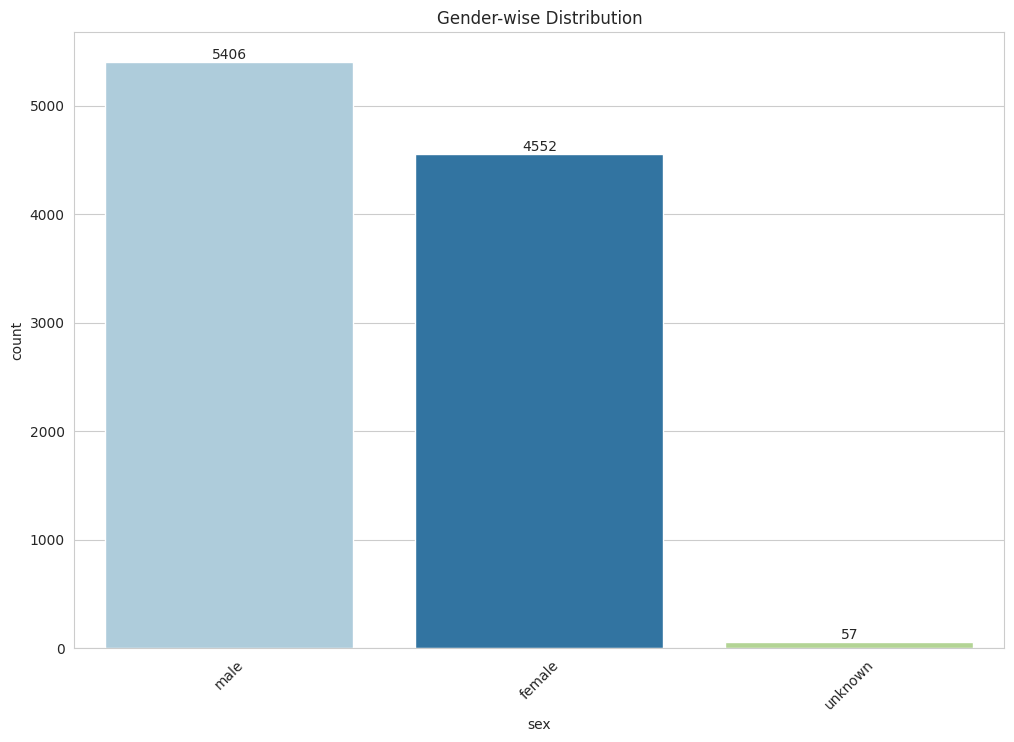

In [ ]:
sns.set_style('whitegrid')
colors = ['#87ace8','#e3784d', 'green']
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='sex',data=df, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Gender-wise Distribution')
plt.xticks(rotation=45)
plt.show()

<ipython-input-74-91834c66b92f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='cell_type',data=df, order = df['cell_type'].value_counts().index, palette = 'Paired')


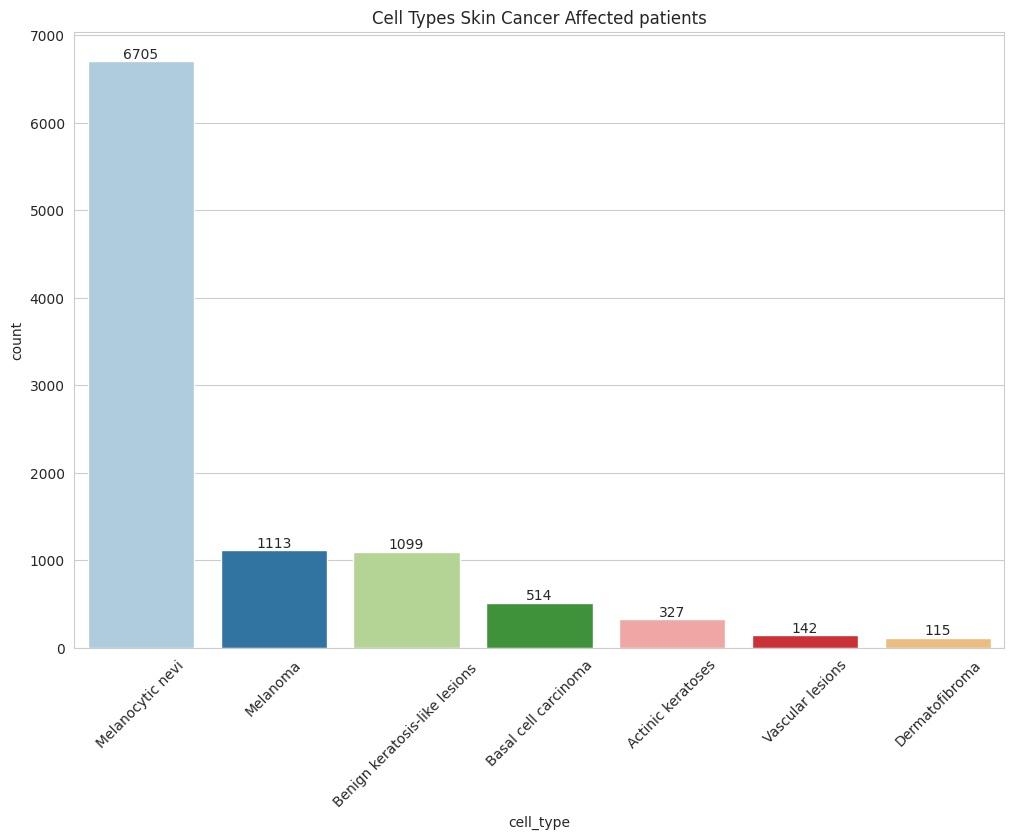

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='cell_type',data=df, order = df['cell_type'].value_counts().index, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Skin Cancer Affected patients')
plt.xticks(rotation=45)
plt.show()

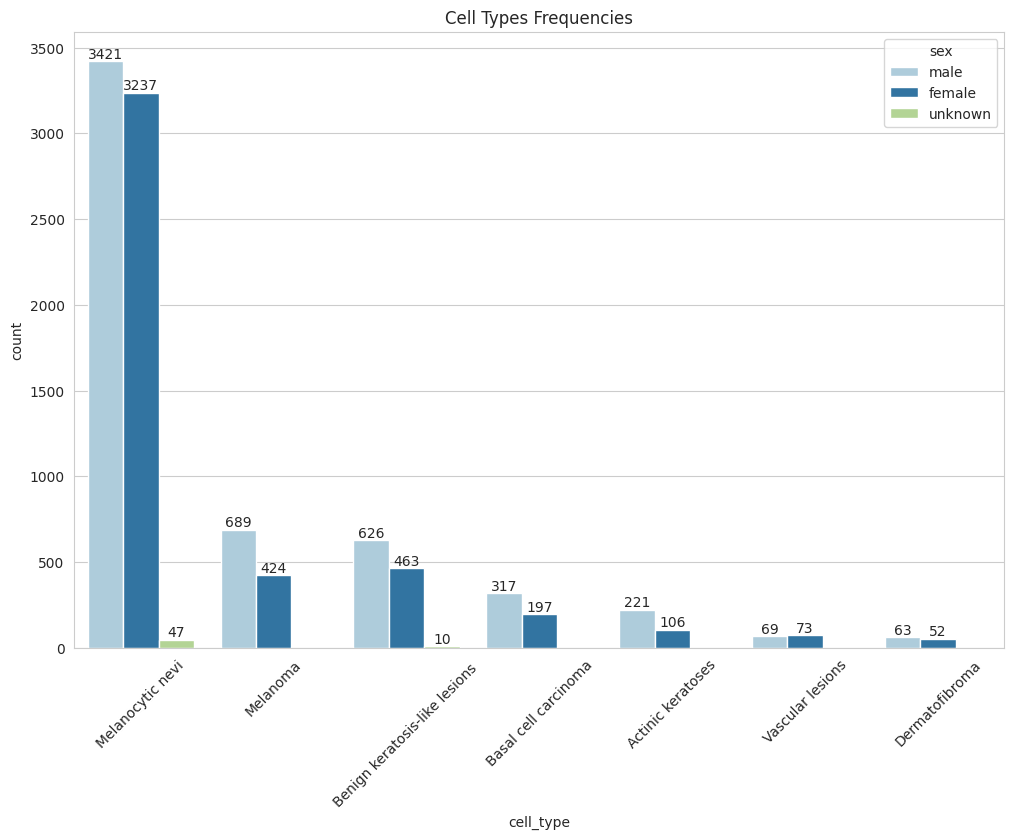

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='cell_type',hue='sex', data=df, order = df['cell_type'].value_counts().index, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Frequencies')
plt.xticks(rotation=45)
plt.show()

<ipython-input-15-8388bbb505b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='dx_type',data=df, order = df['dx_type'].value_counts().index, palette = 'flare')


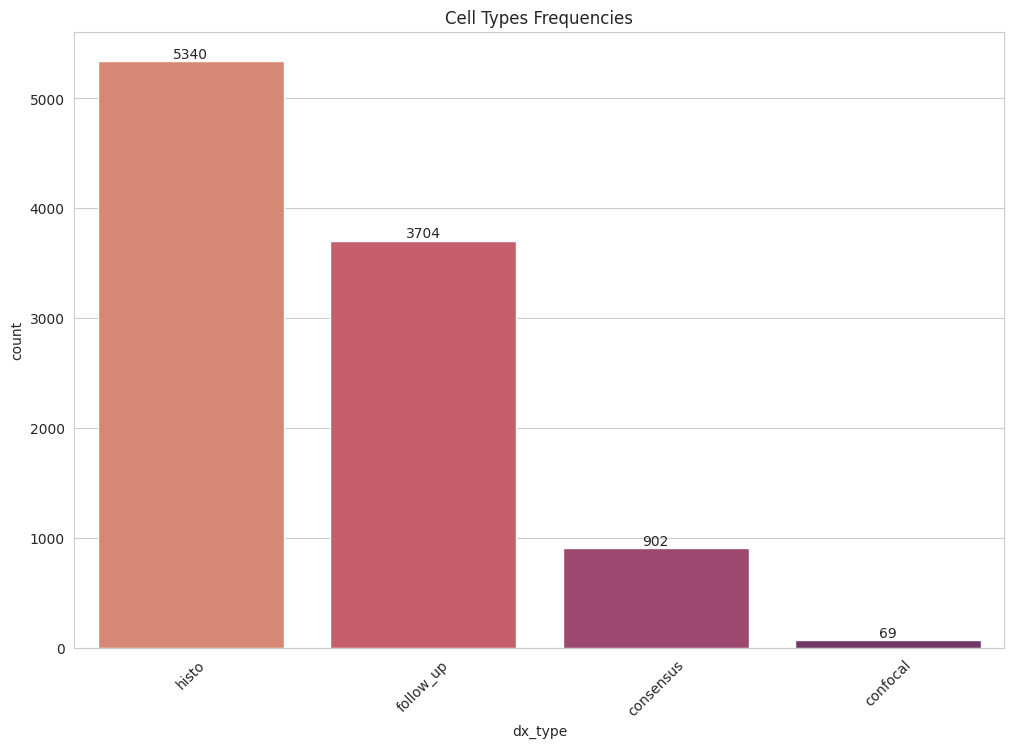

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='dx_type',data=df, order = df['dx_type'].value_counts().index, palette = 'flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Frequencies')
plt.xticks(rotation=45)
plt.show()

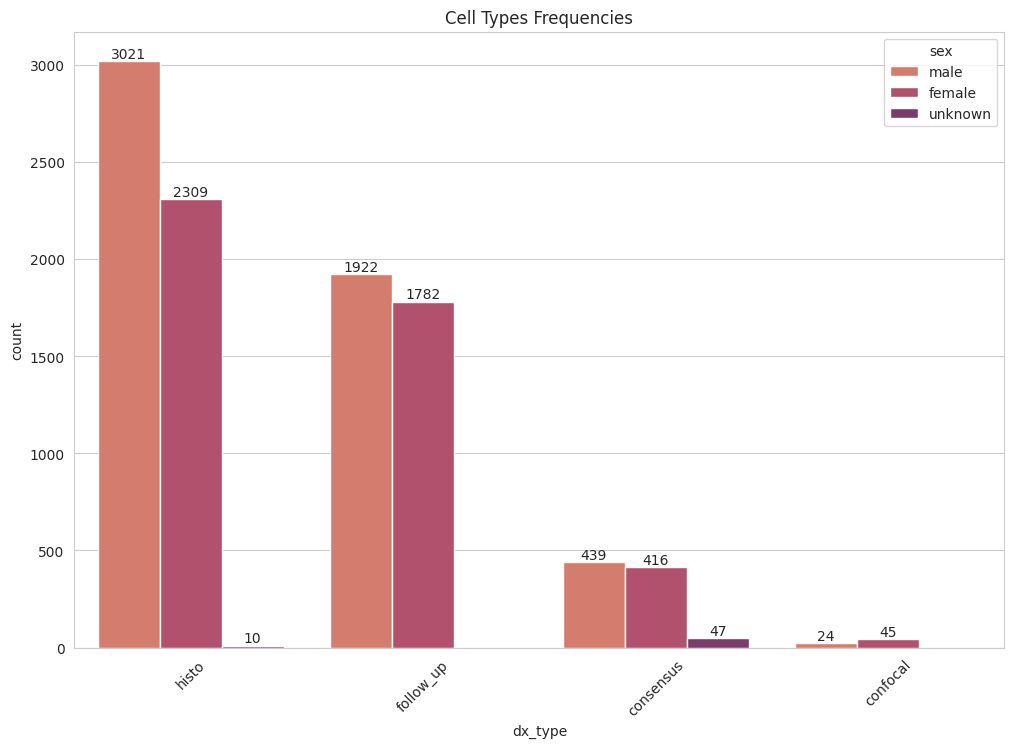

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='dx_type',hue='sex', data=df, order = df['dx_type'].value_counts().index, palette = 'flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Frequencies')
plt.xticks(rotation=45)
plt.show()

<ipython-input-17-bd1bacd93587>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='localization',data=df, order = df['localization'].value_counts().index, palette = 'crest')


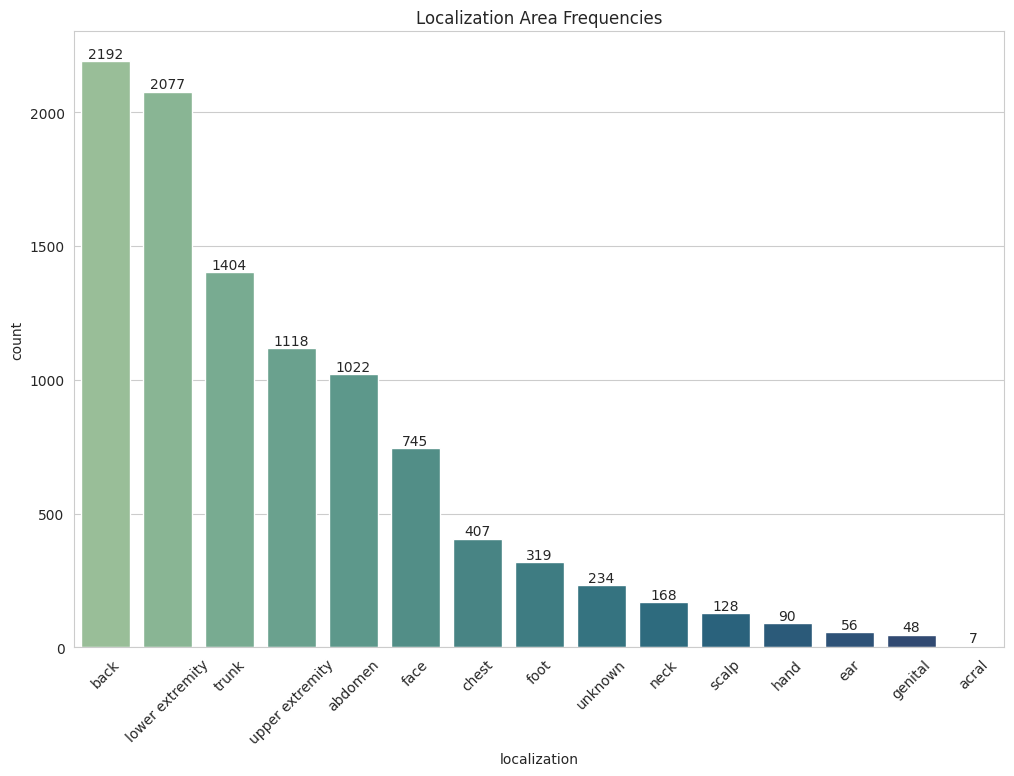

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='localization',data=df, order = df['localization'].value_counts().index, palette = 'crest')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Localization Area Frequencies')
plt.xticks(rotation=45)
plt.show()

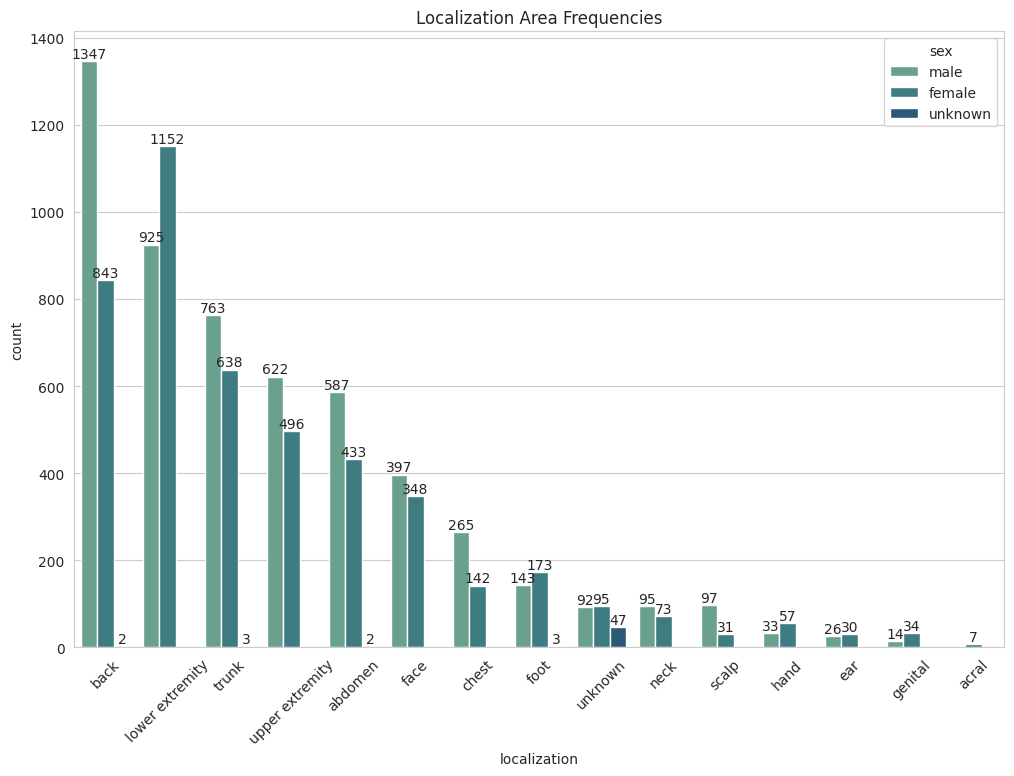

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='localization',hue='sex', data=df, order = df['localization'].value_counts().index, palette = 'crest')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Localization Area Frequencies')
plt.xticks(rotation=45)
plt.show()


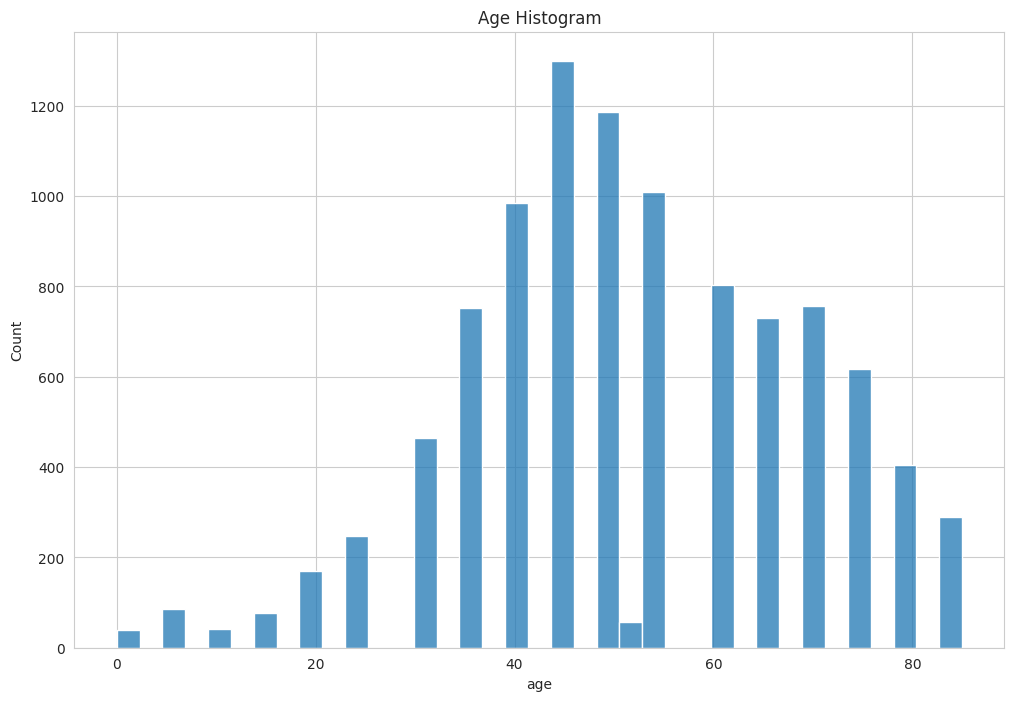

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=df, x='age')
plt.title('Age Histogram')
plt.show()

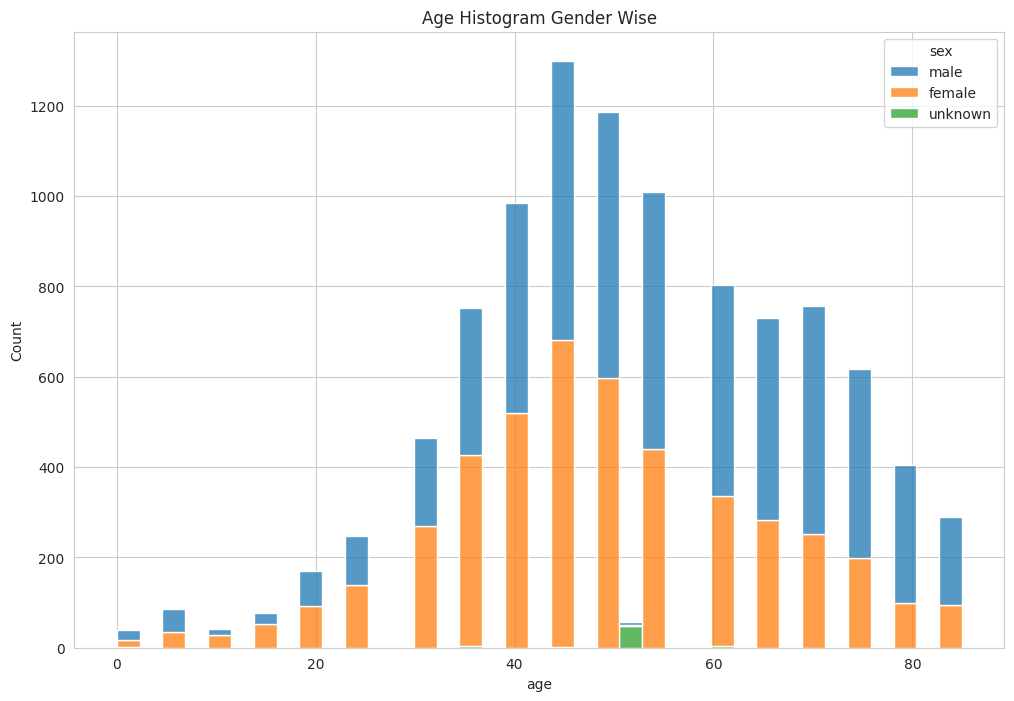

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=df, x='age',hue='sex',multiple='stack')
plt.title('Age Histogram Gender Wise')
plt.show()

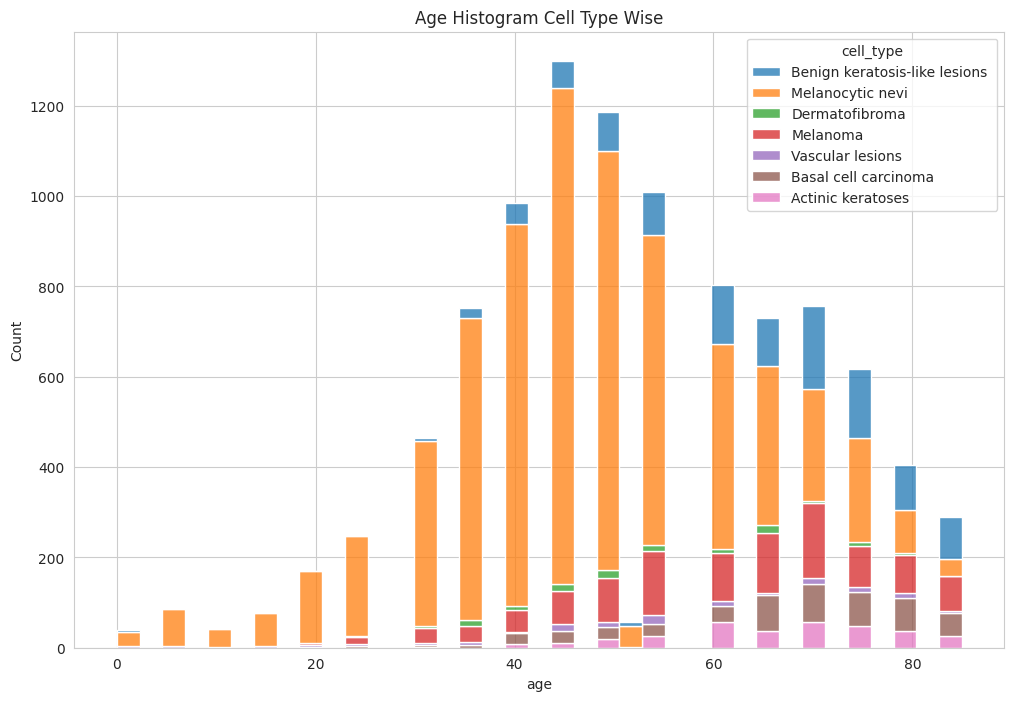

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=df, x='age',hue='cell_type',multiple='stack')
plt.title('Age Histogram Cell Type Wise')
plt.show()

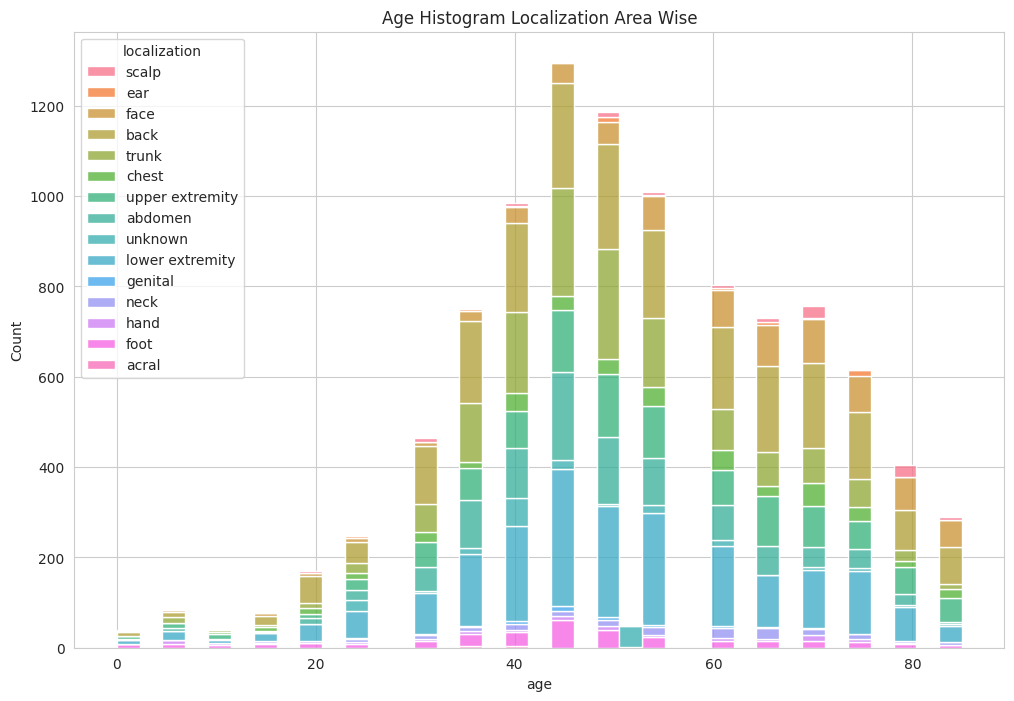

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=df, x='age',hue='localization',multiple='stack')
plt.title('Age Histogram Localization Area Wise')
plt.show()

In [ ]:
# Define paths to your folders and combined directory
part1_dir = '/content/drive/MyDrive/HAM10000_images_part_2'
part2_dir = '/content/drive/MyDrive/HAM10000_images_part_1'
combined_dir = '/content/drive/MyDrive/HAM10000_combined1'

In [ ]:
# Create the combined directory if it doesn't exist
os.makedirs(combined_dir, exist_ok=True)


In [ ]:
# Copy images from part 1 to combined directory
for filename in os.listdir(part1_dir):
    if filename.endswith(".jpg"):  # Ensure it's an image file
        shutil.copy(os.path.join(part1_dir, filename), combined_dir)

In [ ]:
# Copy images from part 2 to combined directory
for filename in os.listdir(part2_dir):
    if filename.endswith(".jpg"):  # Ensure it's an image file
        shutil.copy(os.path.join(part2_dir, filename), combined_dir)


In [ ]:
print("Images combined successfully!")

Images combined successfully!


In [ ]:
# Path to the combined images directory
combined_dir = '/content/drive/MyDrive/HAM10000_combined1'

In [ ]:
# Function to load and preprocess images
def load_images(df, img_dir, img_size=(128, 128)):
    images = []
    labels = []
    for _, row in df.iterrows():
        img_path = os.path.join(img_dir, row['image_id'] + '.jpg')
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(row['dx'])
    return np.array(images), np.array(labels)

# Load images and labels
X, y = load_images(df, combined_dir)


In [ ]:
# Encode labels to numerical format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded = to_categorical(y_encoded)  # Convert to one-hot encoding


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
#BUILD CNN MODEL
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Using ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the model with augmented data
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


184/184 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.6065 - loss: 7.3598 - val_accuracy: 0.6751 - val_loss: 1.0972
Epoch 2/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.6897 - loss: 0.9540 - val_accuracy: 0.6703 - val_loss: 0.9942
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.6813 - loss: 0.9557 - val_accuracy: 0.6778 - val_loss: 0.9172
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.6909 - loss: 0.8871 - val_accuracy: 0.6880 - val_loss: 0.8963
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.6798 - loss: 0.8878 - val_accuracy: 0.6737 - val_loss: 0.8393
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.6978 - loss: 0.8310 - val_accuracy: 0.6778 - val_loss: 0.8440
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.6896 - loss: 0.8779 - val_accuracy: 0.6846 - val_loss: 0.8533
Epoch 8/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.7063 - loss: 0.8079 - val_accuracy: 0.687

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 327ms/step - accuracy: 0.7057 - loss: 0.8055
Test accuracy: 0.7043596506118774


In [ ]:
# Predict labels for the test set
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)


46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 340ms/step


In [ ]:
# Calculate F1 score (macro, micro, and weighted)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print("Confusion Matrix:")
print(conf_matrix)

F1 Score: 0.6333850763952146
Precision: 0.6158463317275914
Confusion Matrix:
[[  0   0  12   0   1  34   0]
 [  0   1  23   0   0  57   0]
 [  0   2  46   0   4 120   1]
 [  0   0   5   0   0  10   1]
 [  0   0   5   0  16 110   1]
 [  0   2  23   0  11 954   1]
 [  0   0   3   0   0   8  17]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)


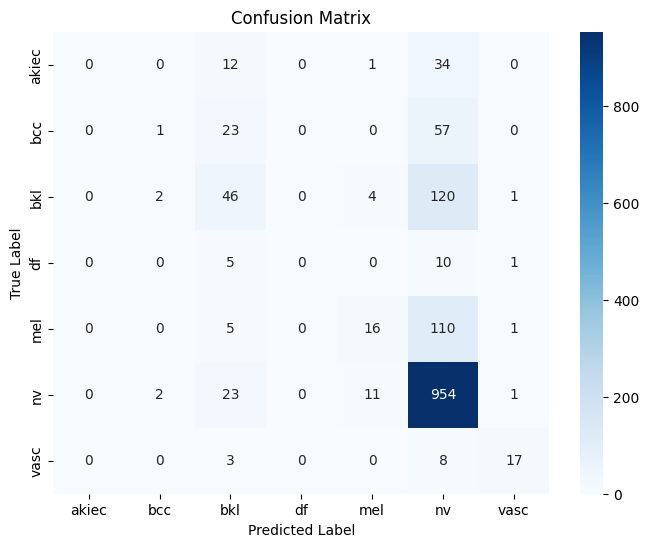

In [ ]:
# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a heatmap with annotations and a color bar
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)

# Labels, title, and formatting
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Combine the image directories
image_dir_part1 = '/content/drive/MyDrive/HAM10000_images_part_1'
image_dir_part2 = '/content/drive/MyDrive/HAM10000_images_part_2'
combined_dir = [image_dir_part1, image_dir_part2]

In [ ]:
#SVM
def load_images(metadata, img_dirs, img_size=(128, 128)):
    images = []
    labels = []
    for _, row in metadata.iterrows():
        img_path = None
        for img_dir in img_dirs:
            temp_path = os.path.join(img_dir, row['image_id'] + '.jpg')
            if os.path.exists(temp_path):
                img_path = temp_path
                break

        if img_path:
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(row['dx'])
    return np.array(images), np.array(labels)

# Load images
X, y = load_images(df, combined_dir)

# Flatten the images for SVM (from 128x128x3 to a 1D vector)
X_flat = X.reshape(X.shape[0], -1)


In [ ]:
# Encode labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y_encoded, test_size=0.2, random_state=42)


In [ ]:
# Initialize the SVM model
svm_model = svm.SVC(kernel='linear')  # You can also try other kernels like 'rbf', 'poly', etc.

# Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

Accuracy: 71.00%
              precision    recall  f1-score   support

       akiec       0.38      0.27      0.32        55
         bcc       0.45      0.49      0.47        82
         bkl       0.43      0.31      0.36       173
          df       0.10      0.06      0.08        16
         mel       0.33      0.19      0.24       132
          nv       0.81      0.91      0.86       981
        vasc       0.68      0.43      0.53        30

    accuracy                           0.71      1469
   macro avg       0.46      0.38      0.41      1469
weighted avg       0.67      0.71      0.69      1469



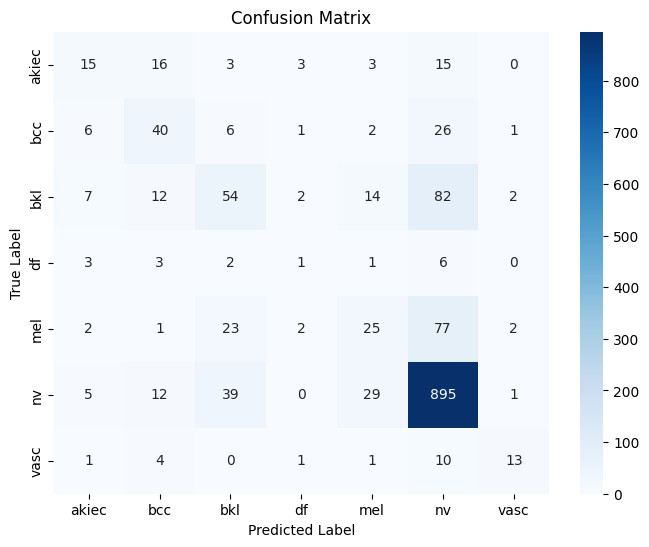

In [10]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [11]:
#DECISION TREE
def load_images(metadata, img_dirs, img_size=(128, 128)):
    images = []
    labels = []
    for _, row in metadata.iterrows():
        img_path = None
        for img_dir in img_dirs:
            temp_path = os.path.join(img_dir, row['image_id'] + '.jpg')
            if os.path.exists(temp_path):
                img_path = temp_path
                break

        if img_path:
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            img = img.astype('float32') / 255.0  # Normalize to [0, 1]
            images.append(img)
            labels.append(row['dx'])
    return np.array(images), np.array(labels)

# Load images
X, y = load_images(df, combined_dir)

# Flatten the images for the Decision Tree (from 128x128x3 to a 1D vector)
X_flat = X.reshape(X.shape[0], -1)


In [12]:
# Encode the labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y_encoded, test_size=0.2, random_state=42)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Accuracy: 65.49%
              precision    recall  f1-score   support

       akiec       0.20      0.22      0.21        55
         bcc       0.38      0.33      0.35        82
         bkl       0.34      0.30      0.32       173
          df       0.10      0.06      0.08        16
         mel       0.25      0.29      0.27       132
          nv       0.82      0.84      0.83       981
        vasc       0.40      0.20      0.27        30

    accuracy                           0.65      1469
   macro avg       0.36      0.32      0.33      1469
weighted avg       0.65      0.65      0.65      1469



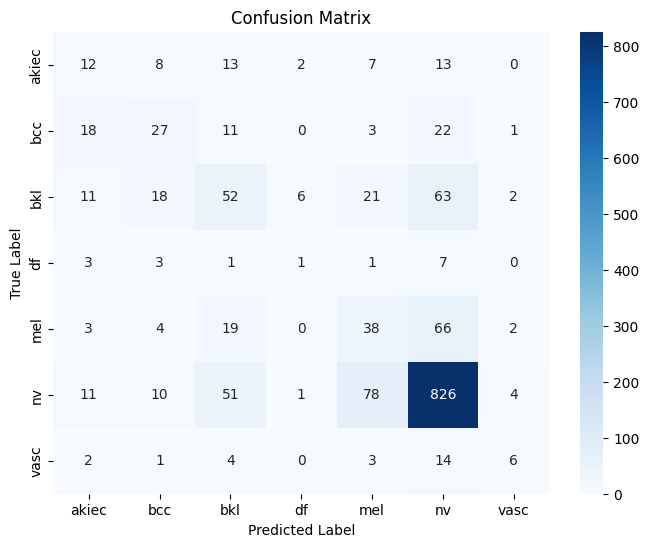

In [16]:
# Predict on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
